In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/BD-RTFX-mkt-2007-2025 - Sheet1.csv')

In [2]:
# Step 1: Inspect the dataset
print("\nInitial Dataset Overview:\n")
print(data.info())


Initial Dataset Overview:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16709 entries, 0 to 16708
Data columns (total 13 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   price_date                          16709 non-null  object 
 1   adm1_name                           16709 non-null  int64  
 2   adm2_name                           16709 non-null  int64  
 3   mkt_name                            16709 non-null  int64  
 4   lat                                 16709 non-null  float64
 5   lon                                 16709 non-null  float64
 6   year                                16709 non-null  int64  
 7   month                               16709 non-null  int64  
 8   o_exchange_rate_unofficial          16709 non-null  float64
 9   h_exchange_rate_unofficial          16709 non-null  float64
 10  l_exchange_rate_unofficial          16709 non-null  float64
 11  c_exchange_ra

In [3]:
# Step 2: Identify columns with missing values
missing_values = data.isnull().sum()
missing_percent = (missing_values / len(data)) * 100
missing_report = pd.DataFrame({
    'Column': data.columns,
    'Missing Values': missing_values,
    'Missing Percentage': missing_percent
}).sort_values(by='Missing Percentage', ascending=False)
print("\nMissing Values Report:\n")
print(missing_report)

# Step 3: Check unique values in each column
unique_values = data.nunique()
unique_report = pd.DataFrame({
    'Column': data.columns,
    'Unique Values': unique_values
}).sort_values(by='Unique Values', ascending=True)
print("\nUnique Values Report:\n")
print(unique_report)


Missing Values Report:

                                                                Column  \
price_date                                                  price_date   
adm1_name                                                    adm1_name   
adm2_name                                                    adm2_name   
mkt_name                                                      mkt_name   
lat                                                                lat   
lon                                                                lon   
year                                                              year   
month                                                            month   
o_exchange_rate_unofficial                  o_exchange_rate_unofficial   
h_exchange_rate_unofficial                  h_exchange_rate_unofficial   
l_exchange_rate_unofficial                  l_exchange_rate_unofficial   
c_exchange_rate_unofficial                  c_exchange_rate_unofficial   
inflation_exc

In [4]:
# Analyze unique values for each column
unique_values = data.nunique()

# Print unique values for review
print("\nUnique Values in Each Column:\n")
print(unique_values)

# Decide on redundant columns (e.g., geo_id might overlap with adm1_name and adm2_name)
# For this example, we will drop geo_id if adm1_name and adm2_name provide the same context
if 'geo_id' in data.columns:
    data_cleaned = data.drop(columns=['geo_id'], errors='ignore')
    print("\nDropped 'geo_id' column due to redundancy.")



Unique Values in Each Column:

price_date                            217
adm1_name                               9
adm2_name                              64
mkt_name                               77
lat                                    77
lon                                    77
year                                   19
month                                  12
o_exchange_rate_unofficial            178
h_exchange_rate_unofficial            184
l_exchange_rate_unofficial            178
c_exchange_rate_unofficial            159
inflation_exchange_rate_unofficial    171
dtype: int64


In [5]:
unique_values

,0
price_date,217
adm1_name,9
adm2_name,64
mkt_name,77
lat,77
lon,77
year,19
month,12
o_exchange_rate_unofficial,178
h_exchange_rate_unofficial,184


In [10]:

adm2_name = data['adm2_name'].unique()




In [12]:
len(adm2_name)

64

In [14]:
# Inspect the dataset
data_cleaned = data
print(data_cleaned.info())
print(data_cleaned.nunique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16709 entries, 0 to 16708
Data columns (total 13 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   price_date                          16709 non-null  object 
 1   adm1_name                           16709 non-null  int64  
 2   adm2_name                           16709 non-null  int64  
 3   mkt_name                            16709 non-null  int64  
 4   lat                                 16709 non-null  float64
 5   lon                                 16709 non-null  float64
 6   year                                16709 non-null  int64  
 7   month                               16709 non-null  int64  
 8   o_exchange_rate_unofficial          16709 non-null  float64
 9   h_exchange_rate_unofficial          16709 non-null  float64
 10  l_exchange_rate_unofficial          16709 non-null  float64
 11  c_exchange_rate_unofficial          16709

In [15]:
# Check missing values
print(data_cleaned.isnull().sum())


price_date                            0
adm1_name                             0
adm2_name                             0
mkt_name                              0
lat                                   0
lon                                   0
year                                  0
month                                 0
o_exchange_rate_unofficial            0
h_exchange_rate_unofficial            0
l_exchange_rate_unofficial            0
c_exchange_rate_unofficial            0
inflation_exchange_rate_unofficial    0
dtype: int64


In [17]:
data_cleaned.head(4)

,price_date,adm1_name,adm2_name,mkt_name,lat,lon,year,month,o_exchange_rate_unofficial,h_exchange_rate_unofficial,l_exchange_rate_unofficial,c_exchange_rate_unofficial,inflation_exchange_rate_unofficial
0,2007-01-01,3,0,0,22.665347,89.792432,2007,1,69.91,69.78,69.53,69.72,-1.63
1,2007-02-01,3,0,0,22.665347,89.792432,2007,2,69.47,69.59,69.01,69.01,-1.63
2,2007-03-01,3,0,0,22.665347,89.792432,2007,3,68.44,68.95,68.23,68.95,-1.63
3,2007-04-01,3,0,0,22.665347,89.792432,2007,4,68.87,69.14,68.60,68.94,-1.63


In [18]:
data_cleaned['price_date'] = pd.to_datetime(data_cleaned['price_date'], errors='coerce')


In [19]:
data_cleaned.head(4)

,price_date,adm1_name,adm2_name,mkt_name,lat,lon,year,month,o_exchange_rate_unofficial,h_exchange_rate_unofficial,l_exchange_rate_unofficial,c_exchange_rate_unofficial,inflation_exchange_rate_unofficial
0,2007-01-01,3,0,0,22.665347,89.792432,2007,1,69.91,69.78,69.53,69.72,-1.63
1,2007-02-01,3,0,0,22.665347,89.792432,2007,2,69.47,69.59,69.01,69.01,-1.63
2,2007-03-01,3,0,0,22.665347,89.792432,2007,3,68.44,68.95,68.23,68.95,-1.63
3,2007-04-01,3,0,0,22.665347,89.792432,2007,4,68.87,69.14,68.60,68.94,-1.63


In [22]:
# # Check for duplicates
# duplicates = data_cleaned.duplicated(subset=['price_date', 'adm1_name'])
# print(f"Number of duplicate rows: {duplicates.sum()}")
# ----------Number of duplicate rows: 14756


# # Check for duplicates
# duplicates = data_cleaned.duplicated(subset=['price_date', 'adm2_name'])
# print(f"Number of duplicate rows: {duplicates.sum()}")
# /Number of duplicate rows: 2821
# # Remove duplicates if any
# # data_cleaned = data_cleaned.drop_duplicates(subset=['price_date', 'adm2_name'])


Number of duplicate rows: 2821


In [23]:
# Check for duplicates using the full composite key
duplicates = data_cleaned.duplicated(subset=['price_date', 'adm1_name', 'adm2_name'])
print(f"Number of duplicate rows: {duplicates.sum()}")

# # Remove duplicates if any
# data_cleaned = data_cleaned.drop_duplicates(subset=['price_date', 'adm1_name', 'adm2_name'])
# print(f"Data shape after removing duplicates: {data_cleaned.shape}")


Number of duplicate rows: 2821


In [25]:
# Identify duplicate rows based on the composite key
duplicates = data_cleaned[data_cleaned.duplicated(subset=['price_date', 'adm1_name', 'adm2_name'], keep=False)]

# Display duplicate rows
print(f"Number of duplicate rows: {len(duplicates)}")
print(duplicates)


Number of duplicate rows: 4774
      price_date  adm1_name  adm2_name  mkt_name        lat        lon  year  \
651   2007-01-01          0          3         3  22.701944  90.371111  2007   
652   2007-02-01          0          3         3  22.701944  90.371111  2007   
653   2007-03-01          0          3         3  22.701944  90.371111  2007   
654   2007-04-01          0          3         3  22.701944  90.371111  2007   
655   2007-05-01          0          3         3  22.701944  90.371111  2007   
...          ...        ...        ...       ...        ...        ...   ...   
16487 2024-09-01          1         11        76  21.242928  92.140437  2024   
16488 2024-10-01          1         11        76  21.242928  92.140437  2024   
16489 2024-11-01          1         11        76  21.242928  92.140437  2024   
16490 2024-12-01          1         11        76  21.242928  92.140437  2024   
16491 2025-01-01          1         11        76  21.242928  92.140437  2025   

       m

In [26]:
# Sort data by composite key to ensure chronological order
data_cleaned = data_cleaned.sort_values(by=['adm1_name', 'adm2_name', 'price_date'])


In [29]:
data_cleaned.tail(2)

,price_date,adm1_name,adm2_name,mkt_name,lat,lon,year,month,o_exchange_rate_unofficial,h_exchange_rate_unofficial,l_exchange_rate_unofficial,c_exchange_rate_unofficial,inflation_exchange_rate_unofficial
15406,2025-01-01,8,61,71,24.896667,91.871667,2025,1,120.06,121.37,119.4,121.37,10.33
15623,2025-01-01,8,61,72,24.890531,91.871936,2025,1,120.06,121.37,119.4,121.37,10.33


In [32]:
# Check for duplicates based on composite key
duplicates = data_cleaned.duplicated(subset=['price_date', 'adm1_name', 'adm2_name'], keep='first')

print(f"Number of rows with duplicate composite keys: {duplicates.sum()}")
# Number of rows with duplicate composite keys: 2821
# # Display the duplicate rows
# duplicate_rows = data_cleaned[duplicates]
# print(duplicate_rows)


Number of rows with duplicate composite keys: 2821


In [33]:
data_cleaned = data_cleaned.drop_duplicates(subset=['price_date', 'adm1_name', 'adm2_name'], keep='first')
print(f"Data shape after removing duplicates: {data_cleaned.shape}")
# Data shape after removing duplicates: (13888, 13)

Data shape after removing duplicates: (13888, 13)


In [34]:
duplicates_check = data_cleaned.duplicated(subset=['price_date', 'adm1_name', 'adm2_name']).sum()
print(f"Remaining duplicates: {duplicates_check}")  # Should print 0


Remaining duplicates: 0


# Division level forcasting

In [35]:
# Aggregate data by division and date
division_data = data_cleaned.groupby(['adm1_name', 'price_date']).mean().reset_index()

# Check the structure of the division-level dataset
print(f"Division-Level Data Shape: {division_data.shape}")
print(division_data.head())


Division-Level Data Shape: (1953, 13)
   adm1_name price_date  adm2_name  mkt_name       lat        lon    year  \
0          0 2007-01-01       16.4      19.6  22.56618  90.261829  2007.0   
1          0 2007-02-01       16.4      19.6  22.56618  90.261829  2007.0   
2          0 2007-03-01       16.4      19.6  22.56618  90.261829  2007.0   
3          0 2007-04-01       16.4      19.6  22.56618  90.261829  2007.0   
4          0 2007-05-01       16.4      19.6  22.56618  90.261829  2007.0   

   month  o_exchange_rate_unofficial  h_exchange_rate_unofficial  \
0    1.0                       69.91                       69.78   
1    2.0                       69.47                       69.59   
2    3.0                       68.44                       68.95   
3    4.0                       68.87                       69.14   
4    5.0                       68.78                       69.09   

   l_exchange_rate_unofficial  c_exchange_rate_unofficial  \
0                       69.53

# District

In [36]:
# Sort the district-level data by district and date
district_data = data_cleaned.sort_values(by=['adm2_name', 'price_date'])

# Check the structure of the district-level dataset
print(f"District-Level Data Shape: {district_data.shape}")
print(district_data.head())


District-Level Data Shape: (13888, 13)
  price_date  adm1_name  adm2_name  mkt_name        lat        lon  year  \
0 2007-01-01          3          0         0  22.665347  89.792432  2007   
1 2007-02-01          3          0         0  22.665347  89.792432  2007   
2 2007-03-01          3          0         0  22.665347  89.792432  2007   
3 2007-04-01          3          0         0  22.665347  89.792432  2007   
4 2007-05-01          3          0         0  22.665347  89.792432  2007   

   month  o_exchange_rate_unofficial  h_exchange_rate_unofficial  \
0      1                       69.91                       69.78   
1      2                       69.47                       69.59   
2      3                       68.44                       68.95   
3      4                       68.87                       69.14   
4      5                       68.78                       69.09   

   l_exchange_rate_unofficial  c_exchange_rate_unofficial  \
0                       69.53     

In [37]:
# Save the datasets to CSV files
division_data.to_csv("division_level_data.csv", index=False)
district_data.to_csv("district_level_data.csv", index=False)


## Plot inflation trends by division

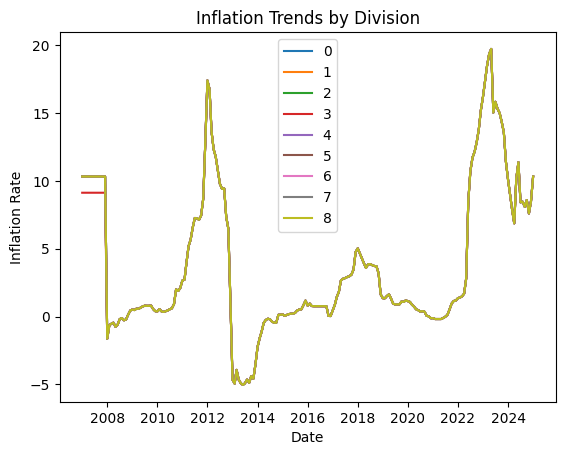

In [38]:
import matplotlib.pyplot as plt

# Plot inflation trends by division
for division in division_data['adm1_name'].unique():
    division_df = division_data[division_data['adm1_name'] == division]
    plt.plot(division_df['price_date'], division_df['inflation_exchange_rate_unofficial'], label=division)

plt.legend()
plt.title('Inflation Trends by Division')
plt.xlabel('Date')
plt.ylabel('Inflation Rate')
plt.show()


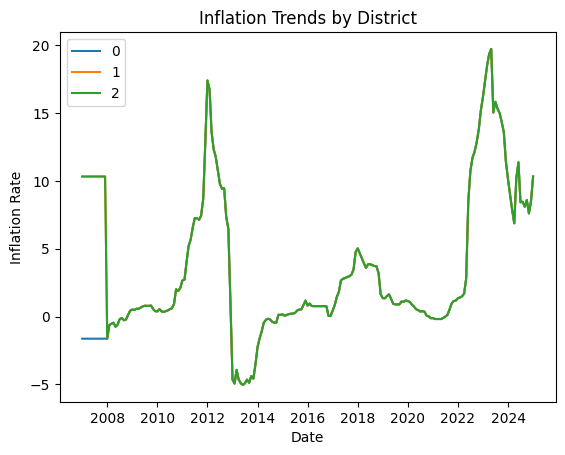

In [42]:
# Plot inflation trends for a few districts
for district in district_data['adm2_name'].unique()[:3]:  # Visualize 5 districts
    district_df = district_data[district_data['adm2_name'] == district]
    plt.plot(district_df['price_date'], district_df['inflation_exchange_rate_unofficial'], label=district)

plt.legend()
plt.title('Inflation Trends by District')
plt.xlabel('Date')
plt.ylabel('Inflation Rate')
plt.show()


In [45]:
# !pip install jupyter-dash dash pandas plotly

In [48]:
# from jupyter_dash import JupyterDash
# from dash import dcc, html
# from dash.dependencies import Input, Output
# import pandas as pd
# import plotly.graph_objects as go
# from statsmodels.tsa.arima.model import ARIMA

# # Load prepared datasets
# division_data = pd.read_csv("division_level_data.csv")  # Aggregated by division
# district_data = pd.read_csv("district_level_data.csv")  # Raw district-level data

# # Convert price_date to datetime
# division_data['price_date'] = pd.to_datetime(division_data['price_date'])
# district_data['price_date'] = pd.to_datetime(district_data['price_date'])

# # Initialize the Dash app
# app = JupyterDash(__name__)

# # Layout
# app.layout = html.Div([
#     html.H1("Inflation Forecasting Dashboard"),

#     # Dropdown to select forecasting scope
#     html.Div([
#         html.Label("Select Forecasting Scope:"),
#         dcc.Dropdown(
#             id='forecast-scope',
#             options=[
#                 {'label': 'Division-Level Forecasting', 'value': 'division'},
#                 {'label': 'District-Level Forecasting', 'value': 'district'}
#             ],
#             value='division',  # Default selection
#             clearable=False
#         )
#     ], style={'marginBottom': '20px'}),

#     # Dropdown to select specific division or district
#     html.Div([
#         html.Label("Select Division/District:"),
#         dcc.Dropdown(id='region-selector', clearable=False)
#     ], style={'marginBottom': '20px'}),

#     # Graph for forecasting
#     dcc.Graph(id='forecast-graph')
# ])

# # Callbacks
# @app.callback(
#     Output('region-selector', 'options'),
#     Output('region-selector', 'value'),
#     Input('forecast-scope', 'value')
# )
# def update_region_selector(scope):
#     if scope == 'division':
#         regions = division_data['adm1_name'].unique()
#     else:
#         regions = district_data['adm2_name'].unique()

#     options = [{'label': region, 'value': region} for region in regions]
#     return options, regions[0]  # Default to the first region


# @app.callback(
#     Output('forecast-graph', 'figure'),
#     Input('forecast-scope', 'value'),
#     Input('region-selector', 'value')
# )
# def update_forecast(scope, region):
#     if scope == 'division':
#         data = division_data[division_data['adm1_name'] == region]
#     else:
#         data = district_data[district_data['adm2_name'] == region]

#     # Train ARIMA model
#     model = ARIMA(data['inflation_exchange_rate_unofficial'], order=(1, 1, 1))
#     model_fit = model.fit()

#     # Forecast future values
#     future_steps = 12
#     forecast = model_fit.forecast(steps=future_steps)

#     # Generate future dates
#     last_date = data['price_date'].iloc[-1]
#     future_dates = pd.date_range(start=last_date, periods=future_steps + 1, freq='M')[1:]

#     # Combine dates and forecast values
#     forecast_df = pd.DataFrame({'Date': future_dates, 'Forecast': forecast})

#     # Create figure
#     fig = go.Figure()
#     fig.add_trace(go.Scatter(
#         x=data['price_date'],
#         y=data['inflation_exchange_rate_unofficial'],
#         mode='lines+markers',
#         name='Historical Data'
#     ))
#     fig.add_trace(go.Scatter(
#         x=forecast_df['Date'],
#         y=forecast_df['Forecast'],
#         mode='lines+markers',
#         name='Forecast'
#     ))
#     fig.update_layout(
#         title=f"Inflation Forecast for {region} ({scope.capitalize()} Scope)",
#         xaxis_title="Date",
#         yaxis_title="Inflation Rate"
#     )
#     return fig

# # Run the app
# app.run_server(mode='inline', debug=True)


In [50]:
from jupyter_dash import JupyterDash
from dash import dcc, html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.graph_objects as go
from statsmodels.tsa.arima.model import ARIMA

# Load prepared datasets
division_data = pd.read_csv("division_level_data.csv")  # Aggregated by division
district_data = pd.read_csv("district_level_data.csv")  # Raw district-level data

# Convert price_date to datetime
division_data['price_date'] = pd.to_datetime(division_data['price_date'])
district_data['price_date'] = pd.to_datetime(district_data['price_date'])

# Function to generate investment advice
def generate_investment_advice(inflation_rate):
    if inflation_rate > 10:
        return "Inflation is high. Consider inflation-protected assets like real estate, gold, or bonds."
    elif inflation_rate > 5:
        return "Inflation is moderate. Diversify with a mix of stocks, real estate, and commodities."
    else:
        return "Inflation is low. It's a good time to invest in growth-oriented sectors like technology or start-ups."

# Initialize the Dash app
app = JupyterDash(__name__)

# Layout
app.layout = html.Div([
    html.H1("Inflation Forecasting Dashboard"),

    # Dropdown to select forecasting scope
    html.Div([
        html.Label("Select Forecasting Scope:"),
        dcc.Dropdown(
            id='forecast-scope',
            options=[
                {'label': 'Division-Level Forecasting', 'value': 'division'},
                {'label': 'District-Level Forecasting', 'value': 'district'}
            ],
            value='division',  # Default selection
            clearable=False
        )
    ], style={'marginBottom': '20px'}),

    # Dropdown to select specific division or district
    html.Div([
        html.Label("Select Division/District:"),
        dcc.Dropdown(id='region-selector', clearable=False)
    ], style={'marginBottom': '20px'}),

    # Graph for forecasting
    dcc.Graph(id='forecast-graph'),

    # Investment advice section
    html.Div([
        html.H2("Investment Insights"),
        html.Div(id='investment-advice', style={'fontSize': '16px', 'color': 'blue'})
    ], style={'marginBottom': '20px'})
])

# Callbacks
@app.callback(
    Output('region-selector', 'options'),
    Output('region-selector', 'value'),
    Input('forecast-scope', 'value')
)
def update_region_selector(scope):
    if scope == 'division':
        regions = division_data['adm1_name'].unique()
    else:
        regions = district_data['adm2_name'].unique()

    options = [{'label': region, 'value': region} for region in regions]
    return options, regions[0]  # Default to the first region


@app.callback(
    Output('forecast-graph', 'figure'),
    Output('investment-advice', 'children'),
    Input('forecast-scope', 'value'),
    Input('region-selector', 'value')
)
def update_forecast(scope, region):
    if scope == 'division':
        data = division_data[division_data['adm1_name'] == region]
    else:
        data = district_data[district_data['adm2_name'] == region]

    # Train ARIMA model
    model = ARIMA(data['inflation_exchange_rate_unofficial'], order=(1, 1, 1))
    model_fit = model.fit()

    # Forecast future values
    future_steps = 12
    forecast = model_fit.forecast(steps=future_steps)

    # Generate future dates
    last_date = data['price_date'].iloc[-1]
    future_dates = pd.date_range(start=last_date, periods=future_steps + 1, freq='M')[1:]

    # Combine dates and forecast values
    forecast_df = pd.DataFrame({'Date': future_dates, 'Forecast': forecast})

    # Create figure
    fig = go.Figure()
    fig.add_trace(go.Scatter(
        x=data['price_date'],
        y=data['inflation_exchange_rate_unofficial'],
        mode='lines+markers',
        name='Historical Data'
    ))
    fig.add_trace(go.Scatter(
        x=forecast_df['Date'],
        y=forecast_df['Forecast'],
        mode='lines+markers',
        name='Forecast'
    ))
    fig.update_layout(
        title=f"Inflation Forecast for {region} ({scope.capitalize()} Scope)",
        xaxis_title="Date",
        yaxis_title="Inflation Rate"
    )

    # Generate investment advice
    latest_rate = forecast.iloc[-1]  # Use the last forecasted value for advice
    advice = generate_investment_advice(latest_rate)

    return fig, advice

# Run the app
# app.run_server(mode='inline', debug=True) # if not work change the port number
app.run_server(mode='inline', debug=True, port=8051)


/usr/local/lib/python3.11/dist-packages/dash/dash.py:579: UserWarning:

JupyterDash is deprecated, use Dash instead.
See https://dash.plotly.com/dash-in-jupyter for more details.



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [54]:
from jupyter_dash import JupyterDash
from dash import dcc, html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.graph_objects as go
from statsmodels.tsa.arima.model import ARIMA

# Load prepared datasets
division_data = pd.read_csv("division_level_data.csv")  # Aggregated by division
district_data = pd.read_csv("district_level_data.csv")  # Raw district-level data

# Convert price_date to datetime
division_data['price_date'] = pd.to_datetime(division_data['price_date'])
district_data['price_date'] = pd.to_datetime(district_data['price_date'])

# Function to generate investment advice
def generate_investment_advice(inflation_rate):
    if inflation_rate > 10:
        return "Inflation is high. Consider inflation-protected assets like real estate, gold, or bonds."
    elif inflation_rate > 5:
        return "Inflation is moderate. Diversify with a mix of stocks, real estate, and commodities."
    else:
        return "Inflation is low. It's a good time to invest in growth-oriented sectors like technology or start-ups."

# Initialize the Dash app
app = JupyterDash(__name__)

# Layout
app.layout = html.Div([
    html.H1("Inflation Forecasting Dashboard"),

    # Dropdown to select forecasting scope
    html.Div([
        html.Label("Select Forecasting Scope:"),
        dcc.Dropdown(
            id='forecast-scope',
            options=[
                {'label': 'Division-Level Forecasting', 'value': 'division'},
                {'label': 'District-Level Forecasting', 'value': 'district'}
            ],
            value='division',  # Default selection
            clearable=False
        )
    ], style={'marginBottom': '20px'}),

    # Dropdown to select specific division or district
    html.Div([
        html.Label("Select Division/District:"),
        dcc.Dropdown(id='region-selector', clearable=False)
    ], style={'marginBottom': '20px'}),

    # Slider to select specific year or date
    html.Div([
        html.Label("Select Year:"),
        dcc.Slider(id='year-slider', min=2000, max=2025, step=1, value=2025,
                   marks={i: str(i) for i in range(2000, 2026, 5)}),
    ], style={'marginBottom': '20px'}),

    # Graph for forecasting
    dcc.Graph(id='forecast-graph'),

    # Investment advice section
    html.Div([
        html.H2("Investment Insights"),
        html.Div(id='investment-advice', style={'fontSize': '16px', 'color': 'blue'})
    ], style={'marginBottom': '20px'})
])

# Callbacks
@app.callback(
    Output('region-selector', 'options'),
    Output('region-selector', 'value'),
    Input('forecast-scope', 'value')
)
def update_region_selector(scope):
    if scope == 'division':
        regions = division_data['adm1_name'].unique()
    else:
        regions = district_data['adm2_name'].unique()

    options = [{'label': region, 'value': region} for region in regions]
    return options, regions[0]  # Default to the first region


@app.callback(
    Output('forecast-graph', 'figure'),
    Output('investment-advice', 'children'),
    Input('forecast-scope', 'value'),
    Input('region-selector', 'value'),
    Input('year-slider', 'value')
)
def update_forecast(scope, region, selected_year):
    if scope == 'division':
        data = division_data[division_data['adm1_name'] == region]
    else:
        data = district_data[district_data['adm2_name'] == region]

    # Filter data based on the selected year
    data = data[data['price_date'].dt.year <= selected_year]

    # Train ARIMA model
    model = ARIMA(data['inflation_exchange_rate_unofficial'], order=(1, 1, 1))
    model_fit = model.fit()

    # Forecast future values
    future_steps = 12
    forecast = model_fit.forecast(steps=future_steps)

    # Generate future dates
    last_date = data['price_date'].iloc[-1]
    future_dates = pd.date_range(start=last_date, periods=future_steps + 1, freq='M')[1:]

    # Combine dates and forecast values
    forecast_df = pd.DataFrame({'Date': future_dates, 'Forecast': forecast})

    # Color-coded historical data
    colors = ['green' if rate <= 5 else 'orange' if rate <= 10 else 'red'
              for rate in data['inflation_exchange_rate_unofficial']]

    # Create figure
    fig = go.Figure()
    fig.add_trace(go.Scatter(
        x=data['price_date'],
        y=data['inflation_exchange_rate_unofficial'],
        mode='lines+markers',
        marker=dict(color=colors),
        name='Historical Data'
    ))
    fig.add_trace(go.Scatter(
        x=forecast_df['Date'],
        y=forecast_df['Forecast'],
        mode='lines+markers',
        marker=dict(color='blue'),
        name='Forecast'
    ))
    fig.update_layout(
        title=f"Inflation Forecast for {region} ({scope.capitalize()} Scope) - Up to {selected_year}",
        xaxis_title="Date",
        yaxis_title="Inflation Rate"
    )

    # Determine the most relevant inflation rate for advice
    if not data.empty:
        relevant_rate = data['inflation_exchange_rate_unofficial'].iloc[-1]
    else:
        relevant_rate = forecast.iloc[-1]

    # Generate investment advice
    advice = generate_investment_advice(relevant_rate)

    return fig, advice

# Run the app
app.run_server(mode='inline', debug=True, port=8052)


/usr/local/lib/python3.11/dist-packages/dash/dash.py:579: UserWarning:

JupyterDash is deprecated, use Dash instead.
See https://dash.plotly.com/dash-in-jupyter for more details.



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [12]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Identify categorical columns
categorical_columns = ['adm1_name', 'adm2_name', 'mkt_name']

# Step 2: Apply Label Encoding
label_encoder = LabelEncoder()
for col in categorical_columns:
    data_cleaned[col] = label_encoder.fit_transform(data_cleaned[col])

print("\nCategorical Columns Encoded with Label Encoding:")
print(data_cleaned[categorical_columns].head())



Categorical Columns Encoded with Label Encoding:
   adm1_name  adm2_name  mkt_name
0          3          0         0
1          3          0         0
2          3          0         0
3          3          0         0
4          3          0         0


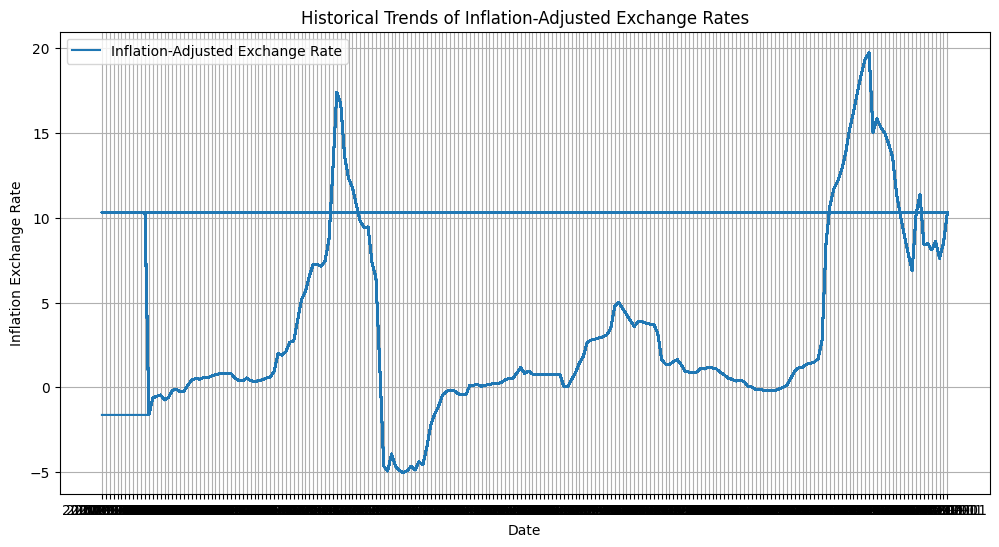

In [13]:
import matplotlib.pyplot as plt

# Plot historical trends
plt.figure(figsize=(12, 6))
plt.plot(data_cleaned['price_date'], data_cleaned['inflation_exchange_rate_unofficial'], label='Inflation-Adjusted Exchange Rate')
plt.title('Historical Trends of Inflation-Adjusted Exchange Rates')
plt.xlabel('Date')
plt.ylabel('Inflation Exchange Rate')
plt.legend()
plt.grid()
plt.show()


In [14]:
import plotly.express as px

# Create an interactive scatter plot
fig = px.scatter(
    data_cleaned,
    x='exchange_rate_unofficial',
    y='inflation_exchange_rate_unofficial',
    color='adm1_name',  # Use encoded region as color
    title='Relationship Between Exchange Rates and Inflation',
    labels={'exchange_rate_unofficial': 'Exchange Rate', 'inflation_exchange_rate_unofficial': 'Inflation Rate'}
)
fig.show()


In [15]:
 data_cleaned.head(2)


,ISO3,country,adm1_name,adm2_name,mkt_name,lat,lon,price_date,year,month,currency,exchange_rate_unofficial,o_exchange_rate_unofficial,h_exchange_rate_unofficial,l_exchange_rate_unofficial,c_exchange_rate_unofficial,inflation_exchange_rate_unofficial,trust_exchange_rate_unofficial
0,BGD,Bangladesh,3,0,0,22.665347,89.792432,2007-01-01,2007,1,BDT,69.72,69.91,69.78,69.53,69.72,-1.63,NaN
1,BGD,Bangladesh,3,0,0,22.665347,89.792432,2007-02-01,2007,2,BDT,69.01,69.47,69.59,69.01,69.01,-1.63,NaN


In [16]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=data_cleaned)

https://docs.google.com/spreadsheets/d/1TeSZbArmUo-y-Alb8JtARRHhDg8nIHi77KthiHixq04#gid=0


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Fit an ARIMA model
model = ARIMA(data_cleaned['inflation_exchange_rate_unofficial'], order=(1, 1, 1))
model_fit = model.fit()

# Forecast future values
forecast = model_fit.forecast(steps=12)  # Predict next 12 months
print("\nFuture Inflation Predictions:\n")
print(forecast)






Future Inflation Predictions:

16709    10.776509
16710    10.875223
16711    10.897046
16712    10.901871
16713    10.902937
16714    10.903173
16715    10.903225
16716    10.903237
16717    10.903239
16718    10.903240
16719    10.903240
16720    10.903240
Name: predicted_mean, dtype: float64


In [ ]:
# Generate future dates
future_dates = pd.date_range(
    start=data_cleaned['price_date'].iloc[-1],  # Last date in the dataset
    periods=13,  # 12 future periods + 1 to include the starting point
    freq='M'  # Assuming monthly data
)[1:]  # Exclude the starting point

# Combine forecast values with dates
forecast_df = pd.DataFrame({
    'Date': future_dates,
    'Predicted Inflation Rate': forecast.values
})

print("\nFuture Inflation Predictions with Dates:\n")
print(forecast_df)



Future Inflation Predictions with Dates:

         Date  Predicted Inflation Rate
0  2025-02-28                 10.776509
1  2025-03-31                 10.875223
2  2025-04-30                 10.897046
3  2025-05-31                 10.901871
4  2025-06-30                 10.902937
5  2025-07-31                 10.903173
6  2025-08-31                 10.903225
7  2025-09-30                 10.903237
8  2025-10-31                 10.903239
9  2025-11-30                 10.903240
10 2025-12-31                 10.903240
11 2026-01-31                 10.903240


<ipython-input-16-0c27ec531328>:2: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



In [ ]:
!pip install jupyter-dash dash pandas plotly


In [ ]:
# from jupyter_dash import JupyterDash
# from dash import dcc, html
# import pandas as pd
# import plotly.graph_objects as go

# # Load the forecast data
# forecast_df = pd.DataFrame({
#     'Date': ['2025-02-28', '2025-03-31', '2025-04-30', '2025-05-31'],
#     'Predicted Inflation Rate': [10.776509, 10.875223, 10.897046, 10.901871]
# })

# # Initialize Dash app
# app = JupyterDash(__name__)

# # Layout
# app.layout = html.Div([
#     html.H1("Inflation Awareness Dashboard"),
#     dcc.Graph(
#         id='forecast-graph',
#         figure={
#             'data': [
#                 go.Scatter(
#                     x=forecast_df['Date'],
#                     y=forecast_df['Predicted Inflation Rate'],
#                     mode='lines+markers',
#                     name='Predicted Inflation'
#                 )
#             ],
#             'layout': {
#                 'title': 'Future Inflation Predictions',
#                 'xaxis': {'title': 'Date'},
#                 'yaxis': {'title': 'Inflation Rate'}
#             }
#         }
#     )
# ])

# # Run the app
# app.run_server(mode='inline', debug=True)


# OR

In [ ]:
from jupyter_dash import JupyterDash
from dash import dcc, html
import pandas as pd
import plotly.graph_objects as go

# Load the forecast data
forecast_df = pd.DataFrame({
    'Date': ['2025-02-28', '2025-03-31', '2025-04-30', '2025-05-31'],
    'Predicted Inflation Rate': [10.776509, 10.875223, 10.897046, 10.901871]
})

# Function to generate advice
def generate_advice(predicted_rate):
    if predicted_rate > 10:
        return "Inflation is high. Citizens should save and focus on essential purchases. Investors should consider inflation-protected assets."
    elif predicted_rate > 5:
        return "Inflation is moderate. Consider balancing spending with investments in stable sectors."
    else:
        return "Inflation is low. This is a good time to invest in growth opportunities or make significant purchases."

# Get advice based on the latest forecast
latest_forecast = forecast_df['Predicted Inflation Rate'].iloc[-1]
advice = generate_advice(latest_forecast)

# Initialize Dash app
app = JupyterDash(__name__)

# Layout
app.layout = html.Div([
    html.H1("Inflation Awareness Dashboard"),
    dcc.Graph(
        id='forecast-graph',
        figure={
            'data': [
                go.Scatter(
                    x=forecast_df['Date'],
                    y=forecast_df['Predicted Inflation Rate'],
                    mode='lines+markers',
                    name='Predicted Inflation'
                )
            ],
            'layout': {
                'title': 'Future Inflation Predictions',
                'xaxis': {'title': 'Date'},
                'yaxis': {'title': 'Inflation Rate'}
            }
        }
    ),
    html.Div([
        html.H2("Insights and Advice"),
        html.P(advice, style={'fontSize': '16px', 'color': 'blue'})
    ])
])

# Run the app
app.run_server(mode='inline', debug=True, port=8051)


/usr/local/lib/python3.11/dist-packages/dash/dash.py:579: UserWarning:

JupyterDash is deprecated, use Dash instead.
See https://dash.plotly.com/dash-in-jupyter for more details.



<IPython.core.display.Javascript object>